<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">MLG Características de vehículos</h2>


### Oscar Julian Layton

El conjunto de datos escribe las características de 392 vehículos, Se pretende explicar las diferencias entre los vehículos con respecto a su rendimiento, en millas por galón (mpg), usando algunas características como:


* **cylinders:** Hace referencia al número de cilindros.
* **displacement:** Desplazamiento del motor, en pulgadas cúbicas.
* **horsepower:** Potencia del motor. 
* **weight:** Peso en libras.
* **acceleration:** Tiempo, en segundos, para acelerar de 0 a 60 millas por hora 
* **origin:** origen que hace referencia a origin = ‘‘1’’, origin = ‘‘2’’ y origin = ‘‘3’’ representan, respectivamente, vehículos americanos, europeos y japoneses.

A continuación se presentan las primeras 10 observaciones del conjunto de datos.

In [ ]:
#rm(list=ls())
getwd()
setwd("")  #Asignando capeta busqueda por default
source("macros.txt")           # Llamar el archivo de macros que esta en la carpeta especifica,
                               # macros son una fuciines especificas creadas porel profesor

In [8]:
require(ISLR)
data(Auto)
head(Auto,n=12)              #primeras 10 observaciones de 394

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


Considerando que se toman características de vehiculos, se puede caracterizar el tipo de automovil con respecto a su origen origin = ‘‘1’’, origin = ‘‘2’’ y origin = ‘‘3’’ que representan, respectivamente, vehículos americanos, europeos y japoneses. Observandose el siguiente boxplot de se logra observar que los vehículos japoneses tienen un mayor rendimiento en millas por galon los cuales en promedio consumen 30.45mpg (millas por galon), caso contrario con los autos de origen americano los cuales por promedio tienen un rendimiento de 20.03mpg (millas por galon), en el caso de los de origen Europeo se tiene que consumen aproximadamente 27.60 mpg.

In [76]:
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


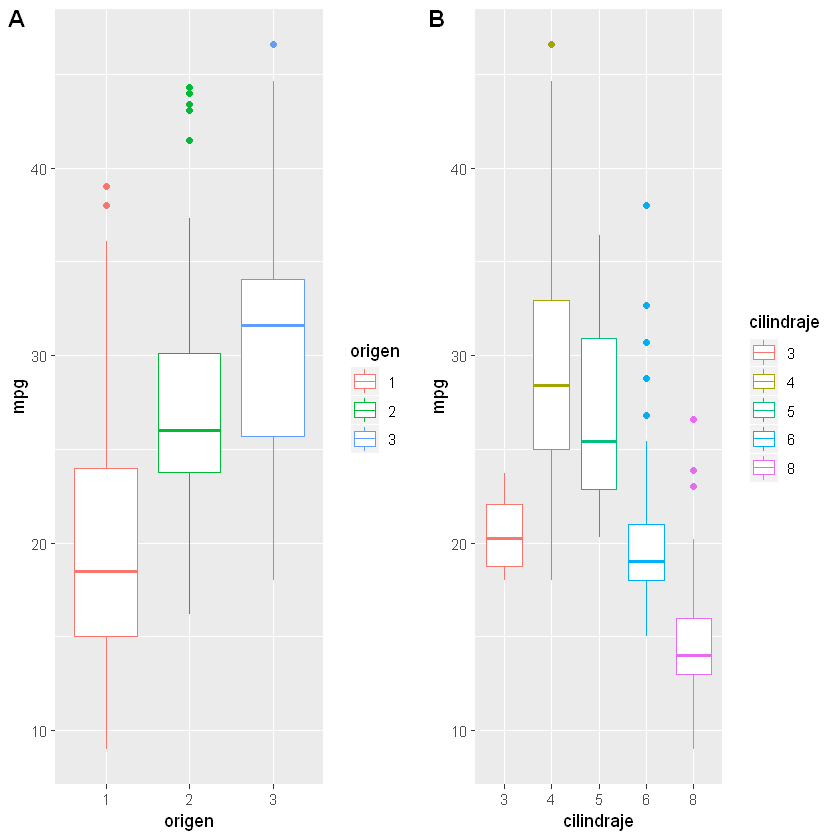

In [63]:
require(ggplot2)
library(cowplot)
origen<-as.factor(Auto$origin)
cilindraje<-as.factor(Auto$cylinders)

p<-ggplot(Auto, aes(x=origen, y=mpg, color=origen)) +
  geom_boxplot()
q<-ggplot(Auto, aes(x=cilindraje, y=mpg, color=cilindraje)) +
  geom_boxplot()

plot_grid(p, q, labels = "AUTO")


No obstante puede observarse el boxplot B, el cual representa al rendimiento en millas por galón **(mpg)** de los automóviles que tienen diferente cilindraje, en este puede observarse que entre mayor el el cilindraje, menor rendimiento genera el vehículo.

Considerando que la variable de respuesta hace referencia al rendimiento en millas por galón **(mpg)** que es continua se procede a ajustar modelos con diferentes distribuciones:

## Ajuste Normal

##### Ajuste Normal con función de enlace Identidad


$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 \mu_k= \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   


In [98]:
fitNormal1 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = gaussian(link="identity"))
#summary(fitNormal1)

#####  Ajuste Normal con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 log(\mu_k)=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [100]:
fitNormal2 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = gaussian(link="log"))
#summary(fitNormal2)

##### Ajuste Normal con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 g^{-1}(\mu_k)=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [101]:
fitNormal3 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = gaussian(link="inverse"))
#summary(fitNormal3)

## Ajuste Gama

##### Ajuste Gama con función de enlace Identidad

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 \mu_k=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [102]:
fitGama1 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = Gamma(link="identity"))
#summary(fitGama1)

##### Ajuste Gama con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 log(\mu_k)=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [103]:
fitGama2 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = Gamma(link="log"))
#summary(fitGama2)

##### Ajuste Gama con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 g^{-1}(\mu_k)=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [104]:
fitGama3 <- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = Gamma(link="inverse"))
#summary(fitGama3)

## Ajuste Normal Inversa

##### Ajuste NI con función de enlace Identidad

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 \mu_k=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [105]:
fitNI1<- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = inverse.gaussian(link="identity"))
#summary(fitNI1)

##### Ajuste NI con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 log(\mu_k)= \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [113]:
fitNI2<- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = inverse.gaussian(link="log"))
summary(fitNI2)


Call:
glm(formula = mpg ~ 1 + factor(cilindraje) + displacement + acceleration + 
    factor(origin) + horsepower * weight, family = inverse.gaussian(link = "log"), 
    data = Auto)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.086322  -0.022331  -0.003998   0.016423   0.117298  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.065e+00  1.768e-01  22.993  < 2e-16 ***
factor(cilindraje)4  2.864e-01  7.878e-02   3.635 0.000316 ***
factor(cilindraje)5  4.216e-01  1.274e-01   3.311 0.001020 ** 
factor(cilindraje)6  1.649e-01  8.585e-02   1.921 0.055498 .  
factor(cilindraje)8  1.545e-01  9.664e-02   1.599 0.110694    
displacement         3.231e-04  3.139e-04   1.029 0.303940    
acceleration        -7.416e-03  4.577e-03  -1.620 0.106029    
factor(origin)2      2.208e-03  2.843e-02   0.078 0.938138    
factor(origin)3      8.063e-02  2.887e-02   2.793 0.005492 ** 
horsepower          -5.829e-03  1.229

##### Ajuste NI con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 g^{-1}(\mu_k)=  \beta_1 + \beta_2 cilynders_{k} +  \beta_3 displacement_{k}+ \beta_4 acceleration_{k} + \beta_5 origin_k +\beta_6 horsepower + \beta_7 weight_{k}+ \beta_8 horsepower:weight _{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [107]:
fitNI3<- glm(mpg ~ 1+ factor(cilindraje) + displacement +acceleration +factor(origin) + horsepower*weight ,data = Auto, family = inverse.gaussian(link="inverse"))
#summary(fitNI3)

### B) Selección del modelo mediante BIC

En correspondencia a los modelos establecidos, se calcula el BIC:

In [112]:
BIC(fitNormal1,fitNormal2,fitNormal3, fitGama1, fitGama2, fitGama3,fitNI1,fitNI2,fitNI3 )

,df,BIC
fitNormal1,13,2217.293
fitNormal2,13,2210.496
fitNormal3,13,2202.363
fitGama1,13,2107.790
fitGama2,13,2106.945
fitGama3,13,2105.637
fitNI1,13,2096.973
fitNI2,13,2100.140
fitNI3,13,2103.727


<div class="alert alert-info">
Según lo anterior, se puede establecer que el modelo que tiene mejor BIC es (fitNI2) el cual hace referencia a un ajuste Normal-Inversa con función de enlace identidad. Ahora bien para seleccionar el mejor modelo se usa step_glm con el criterio BIC con procedimiento backward como se muestra en la siguiente línea :
</div>



In [111]:
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
source("macros.txt")

step_glm(fitNI2, criterion="BIC", direction = "backward")   #forward  o  backward


  Family:  inverse.gaussian 
    Link:  log 

Initial model:
mpg ~ 1 + factor(cilindraje) + displacement + acceleration + factor(origin) + horsepower + weight + horsepower:weight 

Step 0 :    
                     Df       BIC       AIC   Deviance+  Pearson^  p-value*
- displacement        1   2095.3320 2047.6768    0.8136    0.7826    0.3033
- acceleration        1   2097.0744 2049.4193    0.8128    0.7852    0.1052
- factor(origin)      2   2098.9976 2055.3137    0.8094    0.7782    0.0077
- horsepower:weight   1   2099.9164 2052.2612    0.8114    0.7813    0.0205
<none>                    2100.1403 2048.5139    0.8137    0.7837          
- factor(cilindraje)  4   2104.1890 2068.4477    0.8020    0.7754 1.099e-05

Step 1 :  - displacement 
                     Df       BIC       AIC   Deviance+  Pearson^  p-value*
- acceleration        1   2092.6153 2048.9314    0.8125    0.7842    0.0826
- factor(origin)      2   2093.1974 2053.4848    0.8099    0.7785    0.0123
<none>            

El anterior codigo establece el mejor modelo. Se usa el proceso backward (que inicia con el modelo más complejo): 

* **paso 0**: Si se quita el efecto _displacement_ se tendría un BIC=2095.3320 el cual es mucho menor que el bic de los demás efectos principales e interacciones dobles. **CONCLUSIÓN: Sacar elefecto displacement del modelo**.

* **paso 1**: En correspondencia a todos los efectos simples e interaciones dobles se tiene que al quitar el efecto _acceleration_, se obtiene un modleo con BIC=2092.6153 menor **CONCLUSIÓN: Sacar elefecto acceleration del modelo**

* **paso 3**: Si se quita el efecto _origin_ se tendría un BIC=2090.7888 mucho menor que el bic de los demás efectos principales e interacciones dobles. **CONCLUSIÓN: Sacar elefecto origin del modelo**.

* **paso 4**: Si se quita el efecto _2089.3634_ se tendría un BIC2089.3634 mucho menor que el bic de los demás efectos principales e interacciones dobles. **CONCLUSIÓN: Sacar elefecto 2089.3634 del modelo**.

* **paso 5**: Según las indicaciones del procedimiento se sugiere  no hacer nada más, es decir _none_ tendría el BIC=2089.3634 mucho menor que el bic de los demás efectos principales e interacciones dobles restantes. **CONCLUSIÓN: No quitar más efectos**.

Obteniéndose el siguiente predictor lineal: 


$$\eta = 1 + horsepower + weight + horsepower:weight$$

cuyo ajuste es:

In [117]:
ajustefinal<- glm(mpg ~ 1 + horsepower*weight,data = Auto, family = inverse.gaussian(link="log"))
summary(ajustefinal)


Call:
glm(formula = mpg ~ 1 + horsepower * weight, family = inverse.gaussian(link = "log"), 
    data = Auto)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.095026  -0.022058  -0.003469   0.018309   0.112080  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.556e+00  9.410e-02  48.415  < 2e-16 ***
horsepower        -7.254e-03  1.024e-03  -7.087 6.50e-12 ***
weight            -3.743e-04  2.942e-05 -12.721  < 2e-16 ***
horsepower:weight  1.257e-06  2.466e-07   5.097 5.39e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.001070424)

    Null deviance: 2.02706  on 391  degrees of freedom
Residual deviance: 0.40345  on 388  degrees of freedom
AIC: 2069.5

Number of Fisher Scoring iterations: 4


La anterior salida especifica la estimación de los parámetros a partir de 5 iteraciones del scoring de fisher.

### C) test de wald y razón de verosimilitudes

#### Test de WALD

En correspondencia al modelo anterior modelo propuesto surge una pregunta alusiva a si _¿existe evidencia estadísticamente significativa en que el efecto del peso del vehículo sobre su rendimiento esperado depende de la potencia del motor?_ Para responder esta pregunta se realiza el siguiente contraste de hipótesis:

$$H_{0}: \beta_4=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_4 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_4}  - \beta_4^{0})' [\hat{Var}(\hat{\beta_4})]^{-1}(\hat{\beta_4}  - \beta_4^{0})$$


In [120]:
(coef(ajustefinal)[c(4)])^2 /(vcov(ajustefinal)[c(4), c(4)])     #test de wald

horsepower:weight 
         25.98299

Aqui hay que notar que $\xi _{W}=  25.98$ es el mismo test de wald para el casi univariado, vease la salida presentada en _summary(ajustefinal)_ Dese cuenta que $\xi _{W}=  25.98$ que este valor es el que hay que comparar con una $\chi ^2 $ con un grado de libertad, 1df, concluyendose que hay evidencia para rechazar la hipótesis nula, al igual que especifica la salida _summary(ajustefinal)_ en su $p-valor=5.39e^{-7}$. Finalmente **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

#### Otra forma del test de wald

In [119]:
fit<-glm(mpg ~ 1+ horsepower+weight ,data = Auto, family = inverse.gaussian(link="log"))
anova_glm(ajustefinal,fit,test="wald") #test de wald


  Wald test 

 Model 1:  mpg ~ 1 + horsepower * weight 
 Model 2:  mpg ~ 1 + horsepower + weight 

   Chi   Df  Pr(>Chi)    
  25.983  1 3.444e-07 ***


Con el código anterior también se llega a la misma conclusión anterior. **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

#### Test razón de verosimilitudes

_¿existe evidencia estadísticamente significativa en que el efecto del peso del vehículo sobre su rendimiento esperado depende de la potencia del motor?_ Para responder esta pregunta se realiza el siguiente contraste de hipótesis:

$$H_{0}: \beta_4=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_4 \neq 0 $$

Consideradndo el siguiente código se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha\%$ puesto que $\xi _{RV}=26.087>\chi^2(1)$ A firmandose que $\beta_4$ es significativo en el modelo. Es decír **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

In [121]:
anova_glm(ajustefinal,fit, test = "LRT")  


  Likelihood-ratio test 

 Model 1:  mpg ~ 1 + horsepower * weight 
 Model 2:  mpg ~ 1 + horsepower + weight 

   Chi   Df  Pr(>Chi)    
  26.087  1 3.264e-07 ***


### D) Análsis del diagnóstico del modelo

La siguiente gráfica es la de los residuos cuantil, mediante la función **residuals_glm()** la cual genera por defecto los residuos cuantil.

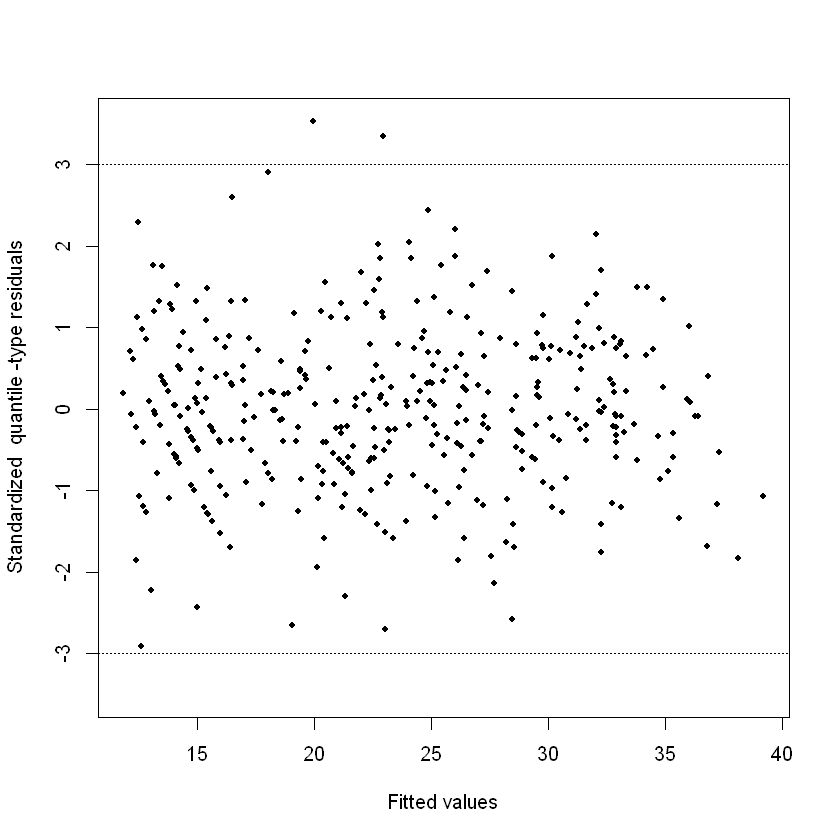

In [122]:
residuals_glm(ajustefinal,identify = 4)

Los carros que tienen altos residuos son (360,382) y menor residuo el auto (29,154).

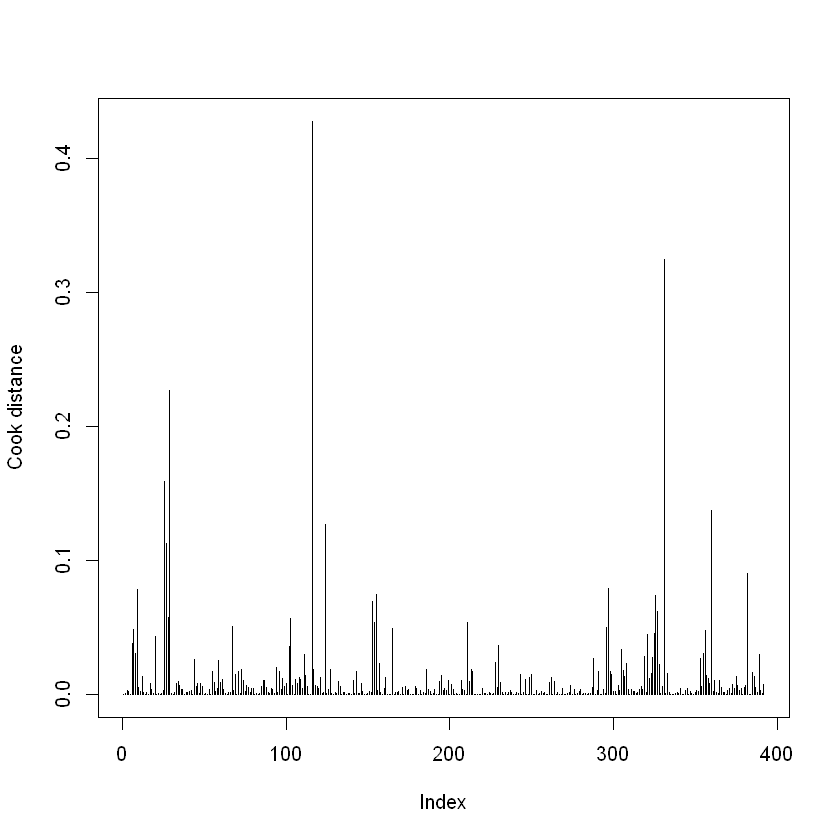

In [123]:
Cookdis_glm(ajustefinal,identify = 6)  

Los carros que aproximadamente tienen más alta distancia de cook son (29,26,360,331,124)  

### ¿Qué sucede si quitamos los puntos alto leverage?

Quitando el dato 331 se tiene:

In [125]:
case.deletion_glm(ajustefinal,subset = c(-360))


                   Estimate  Std. Error   Pr(>|t|)  |  Estimate* Std. Error*
(Intercept)        4.556e+00   9.410e-02          0 |  4.571e+00   9.307e-02
horsepower        -7.254e-03   1.024e-03          0 | -7.290e-03   1.011e-03
weight            -3.743e-04   2.942e-05          0 | -3.823e-04   2.915e-05
horsepower:weight  1.257e-06   2.466e-07          0 |  1.290e-06   2.438e-07
                   Pr(>|t|)* | Change(%)
(Intercept)                0 |    0.3312
horsepower                 0 |   -0.4955
weight                     0 |   -2.1330
horsepower:weight          0 |    2.6337

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 360 se tiene que **(Continúa el signo y la significancia)**

La estimación del intercepto aumentó un $0.3\%$, mientras que la estimación de $\beta_2$ disminuyó $0.4\%$ todo al quitar la observación 360. con respecto a _horsepower:weight_  se tiene que  $\beta_4$ aumento $2.6\%$  No obstante la significancia permaneció prácticamente igual lo cual indica que al quitar el dato 360 las cosas siguen siendo prácticamente iguales con respecto a la significancia.

In [126]:
case.deletion_glm(ajustefinal,subset = c(-382))


                   Estimate  Std. Error   Pr(>|t|)  |  Estimate* Std. Error*
(Intercept)        4.556e+00   9.410e-02          0 |  4.559e+00   9.226e-02
horsepower        -7.254e-03   1.024e-03          0 | -7.238e-03   1.004e-03
weight            -3.743e-04   2.942e-05          0 | -3.781e-04   2.886e-05
horsepower:weight  1.257e-06   2.466e-07          0 |  1.271e-06   2.419e-07
                   Pr(>|t|)* | Change(%)
(Intercept)                0 |    0.0704
horsepower                 0 |    0.2152
weight                     0 |   -1.0147
horsepower:weight          0 |    1.1166

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 382 se tiene que **(Continúa el signo y la significancia)**

La estimación de $\beta_3$ disminuyó $1\%$ todo al quitar la observación 382. No obstante la significancia permaneció igual lo cual indica que al quitar la observación las cosas siguen siendo prácticamente iguales.

### Envelope

En cosideración al modelo descrito se tiene el envelope con respecto a los residuos cuantil:

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


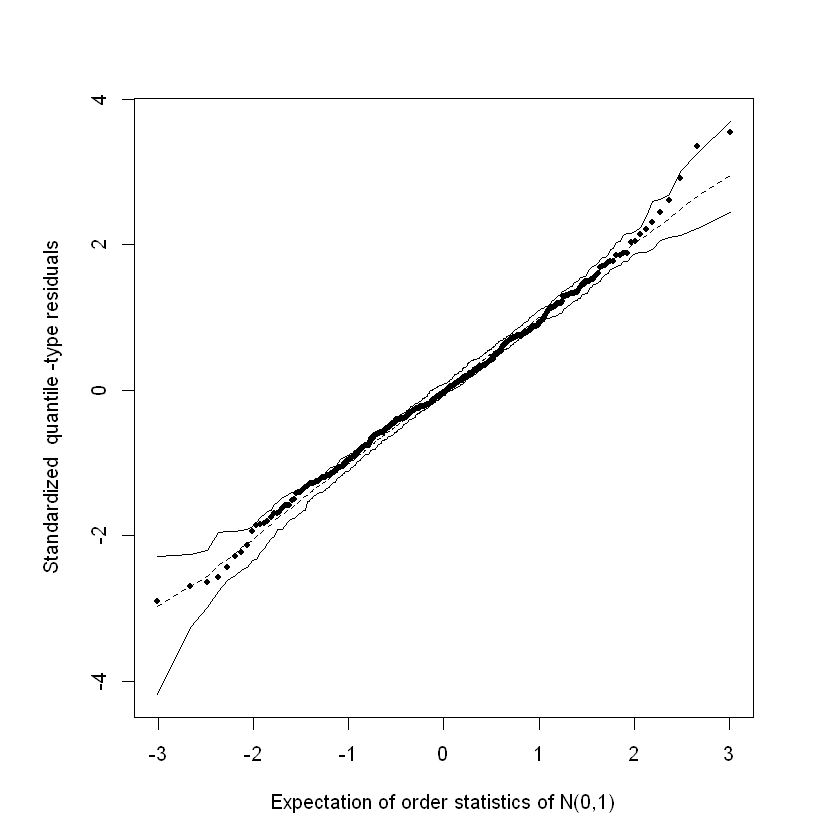

In [131]:
envelope_glm(ajustefinal)

### supuesto de dispersión constante


La homocedasticidad, es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo. Supongase el *modelo Normal inverso heterocedastico* descrito por:

$\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta  \\
		 Y_k \sim NI(\mu_k, \phi_k)\\
         log(\phi_k) =\vartheta_1 + Z_k \vartheta 
	       \end{array}
	     \right.
   \end{equation*}
   $$
  
  
 Tengase en cuenta $\Theta_{(p+q)}$ de dimensión (p+q) donde: $\Theta= \left ( \beta ^r , \vartheta _1, \vartheta ^T \right )^T$ con $\beta$ de dimensión p, $\vartheta _1$ de dimensión 1 y $\vartheta ^T$ de dimensión q-1.
 
La forma de proceder está en contrastar la siguiente hipótesis:

$$H_{0}: \vartheta =0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta \neq  0$$
 
 
 
#####  Test de Score o Rao  (necesita 1 parámetro a estimar $\widehat{\theta}^{(0)}$ )

$$\zeta_{s}=\left \{   [U_{\vartheta}(\theta)]^{T}Var(\widehat{\vartheta})[U_{\vartheta}(\theta)]   \right \} |_{\theta=\widehat{\theta}^{(0)}}  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

Aquí $U(\theta)= \bigtriangledown l(\theta)$ es el vector gradiente y $U_{\vartheta}(\theta)$ los últimos (q-1) valores del vector gradiente.


In [129]:
vdtest(ajustefinal)
bptest(ajustefinal,studentize=FALSE)


             Score test for varying dispersion

          Statistic =  1.50238 
 degrees of freedom =  3 
            p-value =  0.68172 



ERROR: Error in bptest(ajustefinal, studentize = FALSE): no se pudo encontrar la función "bptest"


Luego No se rechaza $H_0$ entonces $H_0= \vartheta =0$ implica que  $log(\phi_k) =\vartheta_1 + Z_k \vartheta$ lo cual da indicios de que $log(\phi_k)$ depende de k lo cual acevera que existe varianza constante.

## Interpretación
 
$$log(\mu_k)= \beta_1 + \beta_2 hosepower_{k} + \beta_3 weigth_{k}+ \beta_4  hosepower:weigth_{k}$$
 

Se describe el rendimiento esperado mpg en millas por galon como:

$$\mu_k=  Exp[\beta_1 + \beta_2 hosepower_{k} + \beta_3 weigth_{k}+ \beta_4  hosepower:weigth_{k}]$$

--- 

Considerando que se desea comparar a dos automoviles que tienen los mismos caballos de fuerza, uno de ellos con una unidad de peso mayor se tiene:
  
 $$\mu_k= \frac{ Exp[(\beta_1 + \beta_2 hosepower_{k})  + (\beta_3 weigth_{k}+ \beta_4  hosepower) (weigth_{k} + \delta)]}{Exp[\beta_1 + \beta_2 hosepower_{k} + (\beta_3 weigth_{k}+ \beta_4  hosepower)weigth_{k}] } = exp((\beta_3 weigth_{k}+ \beta_4  hosepower)\delta) $$
 
$$exp[(\beta_3 weigth_{k}+ \beta_4  hosepower)\delta]=exp[(-68.55*weigth_{k} + 3.11*hosepower)\delta] $$

 Como $\beta_3=-68.55$ es negativo, cuando aumenta el peso $weigth_{k}$ en $\delta$ unidades y al sumar $\beta_3$ se vuelve una cantidad negativa esto significa que el efecto esperado será la exponencial de algo negativo , es decir que a medida que el peso aumenta el rendimiento esperado disminuye.

--- 

Considerando que se desea comparar a dos automoviles que tienenel mismo peso, uno de ellos con un caballo de fuerza mayor se tiene:
  
 $$\mu_k= \frac{ Exp[(\beta_1 + \beta_3 weigth)  + (\beta_2+ \beta_4 weigth_{k}) (hosepower + \delta)]}{Exp[(\beta_1 + \beta_3 weigth)  + (\beta_2+ \beta_4 weigth)hosepower] } = exp((\beta_2+ \beta_4 weigth) \delta) $$
 
$$ exp((-7.254e-03+1.257e-06 weigth_{k}) \delta) = exp((-361.1 + 3.11 weigth_{k}) \delta)  $$

 Como $\beta_2$ es negativo, cuando aumenta los caballos de fuerza en $\delta$ unidades y al sumar $\beta_3$ se vuelve una cantidad negativa esto significa que el efecto esperado será la exponencial de algo negativo , es decir que a medida que el peso aumenta el peso el rendimiento esperado disminuye.

